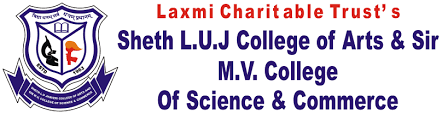

**RAM KUMAR SINGH T118**

**PRACTICAL NO.4**

AIM:
Hypothesis Testing

1)Formulate null and alternative hypotheses for a given problem.

2)Conduct a hypothesis test using appropriate statistical tests (e.g., t-test, chi-square test).

3)Interpret the results and draw conclusions based on the test outcomes

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats import weightstats as stests

df = pd.read_csv("cardio.csv", sep=";")

print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nSummary info:")
print(df.info())


Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

First 5 rows:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Summary info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id  

In [5]:
from scipy import stats

data = df['ap_hi'].dropna()

print("Sample size:", len(data))
print("Sample mean of ap_hi:", data.mean())

H0 = "The average systolic blood pressure is 130 mmHg."
H1 = "The average systolic blood pressure is NOT 130 mmHg."

print("H0:", H0)
print("H1:", H1)

t_stat, p_value = stats.ttest_1samp(data, 130)

print("Test statistic (t):", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis at 5% level.")
else:
    print("Conclusion: Fail to reject the null hypothesis at 5% level.")


Sample size: 70000
Sample mean of ap_hi: 128.8172857142857
H0: The average systolic blood pressure is 130 mmHg.
H1: The average systolic blood pressure is NOT 130 mmHg.
Test statistic (t): -2.031776528710943
p-value: 0.04218005328272404
Conclusion: Reject the null hypothesis at 5% level.


In [6]:
from scipy.stats import ttest_ind

smokers = df[df['smoke'] == 1]['ap_hi'].dropna()
nonsmokers = df[df['smoke'] == 0]['ap_hi'].dropna()

print("Smokers count:", len(smokers))
print("Non-smokers count:", len(nonsmokers))

print("Mean ap_hi (smokers):", smokers.mean())
print("Mean ap_hi (non-smokers):", nonsmokers.mean())

print("Std ap_hi (smokers):", smokers.std())
print("Std ap_hi (non-smokers):", nonsmokers.std())

ttest_stat, pval = ttest_ind(smokers, nonsmokers, equal_var=False)
print("Test statistic (t):", ttest_stat)
print("p-value:", pval)

alpha = 0.05
if pval < alpha:
    print("Conclusion: We reject H0 (significant difference in mean BP).")
else:
    print("Conclusion: Fail to reject H0 (no significant difference).")


Smokers count: 6169
Non-smokers count: 63831
Mean ap_hi (smokers): 128.36051223861242
Mean ap_hi (non-smokers): 128.86143096614498
Std ap_hi (smokers): 18.45432112947516
Std ap_hi (non-smokers): 161.18006854827797
Test statistic (t): -0.736802791500064
p-value: 0.461244784929987
Conclusion: Fail to reject H0 (no significant difference).


In [7]:
from scipy import stats

paired_df = df[['ap_hi', 'ap_lo']].dropna()

print(paired_df.describe())

ttest_stat, pval = stats.ttest_rel(paired_df['ap_hi'], paired_df['ap_lo'])
print("Paired t-test statistic:", ttest_stat)
print("Paired t-test p-value:", pval)

alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject H0 (systolic and diastolic means differ).")
else:
    print("Conclusion: Fail to reject H0 (no significant difference).")


              ap_hi         ap_lo
count  70000.000000  70000.000000
mean     128.817286     96.630414
std      154.011419    188.472530
min     -150.000000    -70.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max    16020.000000  11000.000000
Paired t-test statistic: 35.26673496395494
Paired t-test p-value: 4.508976529975584e-270
Conclusion: Reject H0 (systolic and diastolic means differ).


In [8]:
from statsmodels.stats import weightstats as stests

ap_hi = df['ap_hi'].dropna()

z_stat, pval = stests.ztest(ap_hi, value=130)
print("Z statistic (one-sample):", float(z_stat))
print("p-value:", float(pval))

alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject H0 (mean ap_hi ≠ 130).")
else:
    print("Conclusion: Fail to reject H0 (mean ap_hi = 130).")


Z statistic (one-sample): -2.031776528710943
p-value: 0.04217628436665624
Conclusion: Reject H0 (mean ap_hi ≠ 130).


In [9]:
smokers = df[df['smoke'] == 1]['ap_hi'].dropna()
nonsmokers = df[df['smoke'] == 0]['ap_hi'].dropna()

z_stat2, pval2 = stests.ztest(smokers, x2=nonsmokers, value=0, alternative='two-sided')
print("Z statistic (two-sample):", float(z_stat2))
print("p-value:", float(pval2))

alpha = 0.05
if pval2 < alpha:
    print("Conclusion: Reject H0 (mean ap_hi differs for smokers vs non-smokers).")
else:
    print("Conclusion: Fail to reject H0 (no significant difference).")


Z statistic (two-sample): -0.24394145890090263
p-value: 0.8072761593378546
Conclusion: Fail to reject H0 (no significant difference).


In [10]:
from scipy.stats import chi2_contingency
import pandas as pd\
contingency_table = pd.crosstab(df['gender'], df['cardio'])

print("Contingency table (Gender vs Cardio):")
print(contingency_table)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 (Gender and cardio are associated).")
else:
    print("Conclusion: Fail to reject H0 (no significant association).")


Contingency table (Gender vs Cardio):
cardio      0      1
gender              
1       22914  22616
2       12107  12363

Chi-square statistic: 4.569519103869497
p-value: 0.03254570031936317
Degrees of freedom: 1
Expected frequencies:
[[22778.659 22751.341]
 [12242.341 12227.659]]
Conclusion: Reject H0 (Gender and cardio are associated).
